In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib
import streamlit as st

In [82]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\kc_house_data.csv (1)\\kc_house_data.csv")

In [83]:
df.shape

(21613, 21)

In [84]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
df['condition'].mean()

np.float64(3.4094295100171195)

In [86]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [87]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

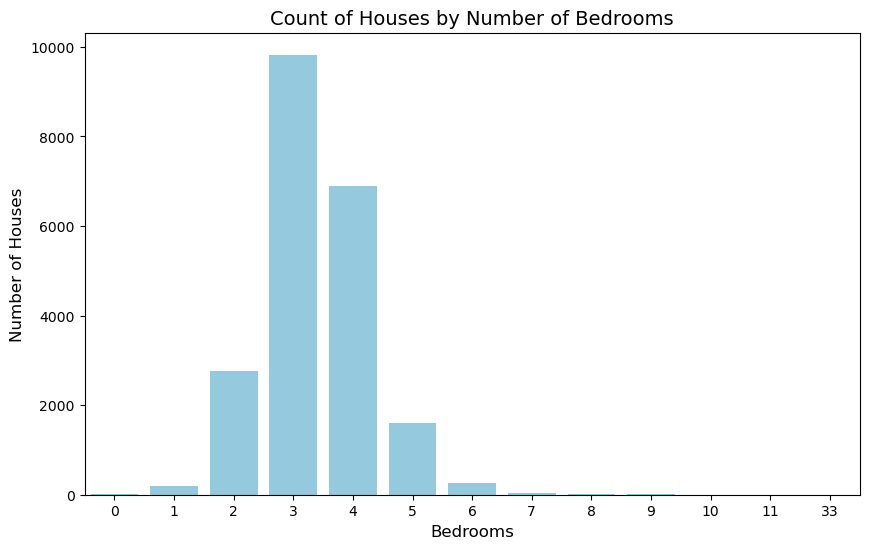

In [88]:
plt.figure(figsize=(10, 6))
bedroom_counts = df['bedrooms'].value_counts().sort_index()
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='skyblue')
plt.title('Count of Houses by Number of Bedrooms', fontsize=14)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.savefig('visual_bedroom_count.png')

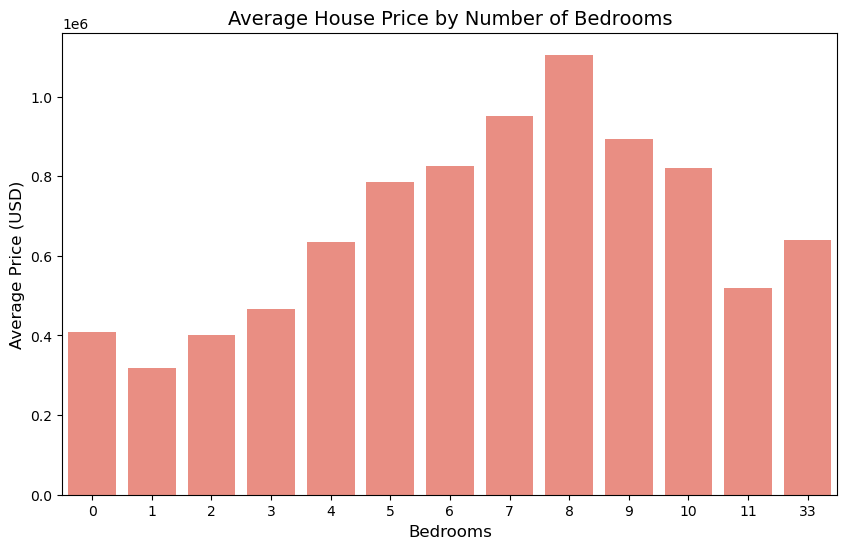

In [89]:
plt.figure(figsize=(10, 6))
mean_price_bed = df.groupby('bedrooms')['price'].mean().sort_index()
sns.barplot(x=mean_price_bed.index, y=mean_price_bed.values, color='salmon')
plt.title('Average House Price by Number of Bedrooms', fontsize=14)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.savefig('visual_price_bedroom.png')

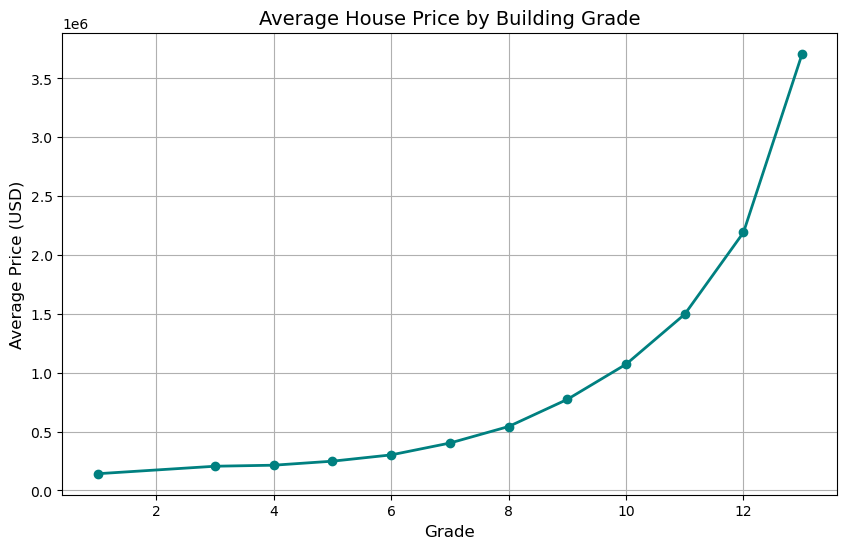

In [90]:
plt.figure(figsize=(10, 6))
mean_price_grade = df.groupby('grade')['price'].mean().sort_index()
plt.plot(mean_price_grade.index, mean_price_grade.values, marker='o', linestyle='-', color='teal', linewidth=2)
plt.title('Average House Price by Building Grade', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(True)
plt.savefig('visual_price_grade.png')

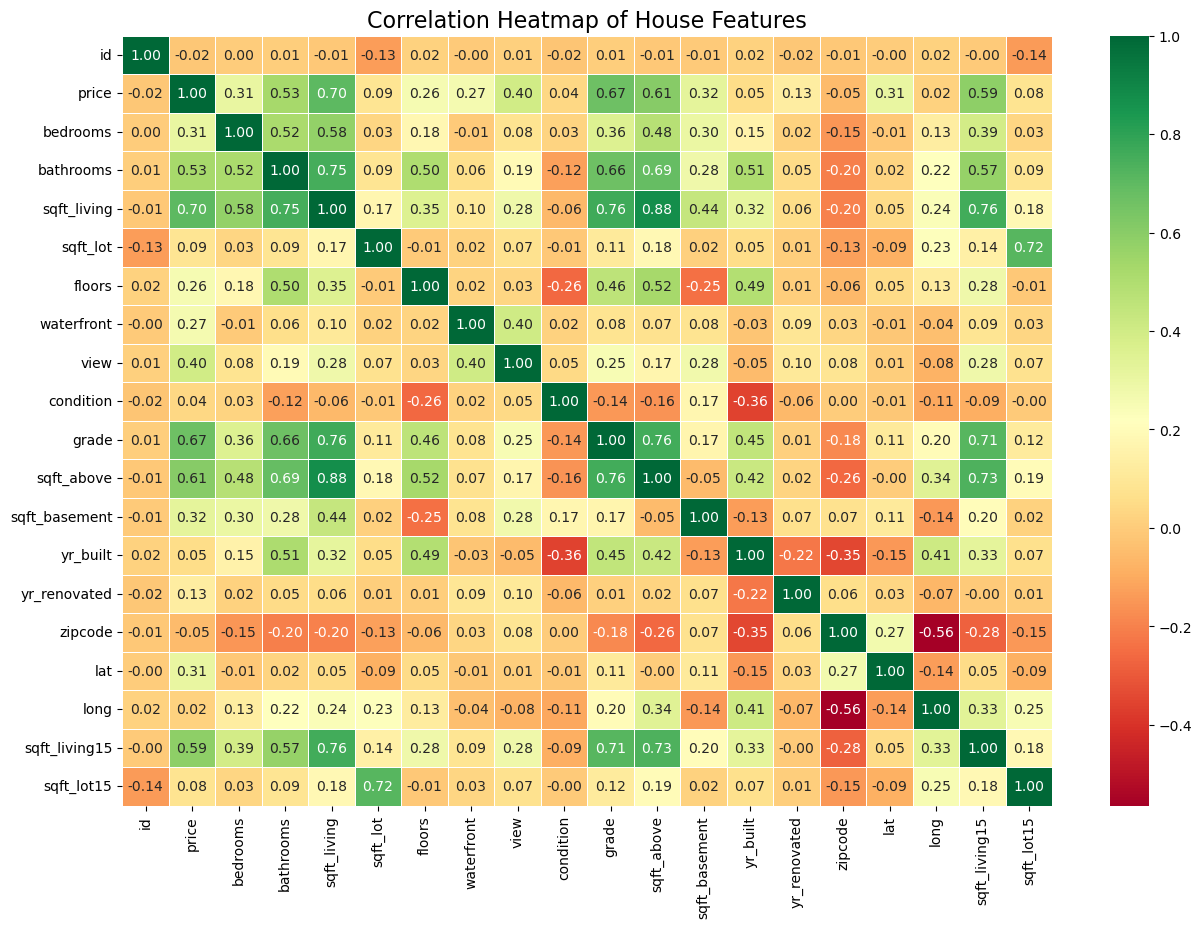

In [91]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of House Features', fontsize=16)
plt.show()

In [92]:
x = df.drop(['id','date','floors','waterfront','view','sqft_lot','sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15','price'],axis=1)
y = df['price']

In [93]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [94]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [95]:
numerical_transformer= Pipeline (steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [96]:
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [97]:
preprocessor =ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols ),
    ('cat',categorical_transformer,categorical_cols )
])

In [98]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
model =Pipeline(steps=[
    ('pre',preprocessor),('reg',LinearRegression())
])

In [100]:
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'condition',
                                                   'grade', 'yr_built',
                                                   'zipcode', 'lat', 'long']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', LinearRegression())])

In [101]:
y_pred = model.predict(X_test)

print(f'Accuracy:{r2_score(y_pred,y_test)*100:.2f}')

Accuracy:43.56


In [102]:
model2 = Pipeline(steps=[
    ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=200,random_state=42))
])

In [103]:
model2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'condition',
                                                   'grade', 'yr_built',
                                                   'zipcode', 'lat', 'long']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [104]:
y_pred2 =model2.predict(X_test)

print(f'Accuracy:{r2_score(y_pred2,y_test)*100:.2f}')

Accuracy:79.61


In [105]:
joblib.dump(model2,'randomforestregressor')

['randomforestregressor']

In [106]:
load=joblib.load('randomforestregressor')
st.title('House Price Prediction')
bedrooms=st.number_input('bedrooms')
bathrooms=st.number_input('bathrooms')
sqft_living=st.number_input('sqft_living')
grade=st.number_input('grade')
condition=st.number_input('condition')
yr_built=st.number_input('yr_built')
zipcode=st.number_input('zipcode')
lat=st.number_input('lat')
long =st.number_input('long')
if st.button('predict'):
    data = pd.DataFrame({
         'bedrooms':[bedrooms],
        'bathrooms':[bathrooms],
      'sqft_living':[sqft_living],
            'grade':[grade],
        'condition':[condition],
         'yr_built':[yr_built],
          'zipcode':[zipcode],
              'lat':[lat],
             'long':[long]
    })
    prediction =load.predict(data)
    st.success(f'Price:{prediction[0]}')
        

2026-02-27 00:05:07.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 00:05:07.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar